## **In this Notebook**

#### Run the first k-means clustering algorithm for the flight delay analysis. 
#### General goal to uncover patterns that aren’t otherwise visible. 
#### Create some visualizations and provide interpretations of the outputs. 
#### Conclude by making proposals for how these insights can help further the analysis.

## **Contents**
### **1. Import Libraries**
### **2. Import Data & Clean and Reprocess as Needed**
### **3. Apply Elbow Technique**
### **4. Select Number of Clusters**
### **5. Run K-Means Algorithm**
### **6. Attach Clusters Column to Dataframe**
### **7. Visualize Clusters with Different Variables**
### **8. Discussion about Clusters**
### **9. Descriptive Statistics for Clusters**
### **10. Impact of Results for Future Analysis**

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # for k-means algorithm.
import pylab as pl # Convenience module that bulk imports matplotlib.

In [2]:
# Adjust setting to display graphs in notebook without the need to "call" them.

%matplotlib inline

#### 2. Import Data & Clean and Reprocess as Needed

In [3]:
# Set Path

path = r'D:\Data Analytics\Flight Delay Analysis\01 - Data\Wrangled Data'

# Import Delayed Flights dataset

df = pd.read_csv(os.path.join(path, 'delayed_flights.csv'), index_col=0)

In [4]:
df.shape

(2249253, 47)

In [5]:
df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Date,Marketing_Airline_Network_Code,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,...,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Duplicate,Missing_Due_To_Cancellation,Airline,Marketing_Airline_Network
11,2019,1,1,4,5,2019-01-04,UA,OO,N693BR,5670,...,3,13.0,0.0,3.0,0.0,10.0,N,False,SkyWest Airlines Inc.,United Airlines Inc.
50,2019,1,1,4,5,2019-01-04,UA,OO,N960SW,5714,...,1,0.0,0.0,20.0,0.0,0.0,N,False,SkyWest Airlines Inc.,United Airlines Inc.
59,2019,1,1,4,5,2019-01-04,UA,OO,N743SK,5726,...,1,60.0,0.0,0.0,0.0,0.0,N,False,SkyWest Airlines Inc.,United Airlines Inc.
65,2019,1,1,4,5,2019-01-04,UA,OO,N792SK,5733,...,1,0.0,760.0,34.0,0.0,0.0,N,False,SkyWest Airlines Inc.,United Airlines Inc.
101,2019,1,1,4,5,2019-01-04,UA,OO,N791SK,5775,...,5,135.0,0.0,21.0,0.0,0.0,N,False,SkyWest Airlines Inc.,United Airlines Inc.


#### This data has a lot of categorical variables and therefore I will create a subset to work with on this k-means analysis.

In [6]:
pd.set_option('display.max_rows', 50)

In [7]:
df.dtypes #identify non-numerical variables

Year                                 int64
Quarter                              int64
Month                                int64
Day_of_Month                         int64
Day_of_Week                          int64
Flight_Date                         object
Marketing_Airline_Network_Code      object
Operating_Airline                   object
Tail_Number                         object
Flight_Number_Operating_Airline      int64
Origin                              object
Origin_City_Name                    object
Origin_State                        object
Origin_State_Name                   object
Dest                                object
Dest_City_Name                      object
Dest_State                          object
Dest_State_Name                     object
Dep_Time                           float64
Dep_Delay                          float64
Dep_Delay_Minutes                  float64
Dep_Del_15                         float64
Departure_Delay_Groups             float64
Dep_Time_Bl

In [8]:
# Create a subset dataframe that removes any columns that are not numerical

df_num = df.select_dtypes(include=['number'])

In [10]:
df_num.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Number_Operating_Airline,Dep_Time,Dep_Delay,Dep_Delay_Minutes,Dep_Del_15,...,Actual_Elapsed_Time,Air_Time,Flights,Distance,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
11,2019,1,1,4,5,5670,708.0,23.0,23.0,1.0,...,127.0,97.0,1.0,642.0,3,13.0,0.0,3.0,0.0,10.0
50,2019,1,1,4,5,5714,2252.0,-4.0,0.0,0.0,...,92.0,42.0,1.0,190.0,1,0.0,0.0,20.0,0.0,0.0
59,2019,1,1,4,5,5726,1337.0,62.0,62.0,1.0,...,63.0,28.0,1.0,125.0,1,60.0,0.0,0.0,0.0,0.0
65,2019,1,1,4,5,5733,905.0,760.0,760.0,1.0,...,93.0,48.0,1.0,125.0,1,0.0,760.0,34.0,0.0,0.0
101,2019,1,1,4,5,5775,1011.0,135.0,135.0,1.0,...,214.0,154.0,1.0,1013.0,5,135.0,0.0,21.0,0.0,0.0


In [11]:
df_num.shape

(2249253, 29)

In [12]:
df_num.isnull().sum()

Year                                     0
Quarter                                  0
Month                                    0
Day_of_Month                             0
Day_of_Week                              0
Flight_Number_Operating_Airline          0
Dep_Time                                 0
Dep_Delay                                0
Dep_Delay_Minutes                        0
Dep_Del_15                               0
Departure_Delay_Groups                   0
Arr_Time                                 0
Arr_Delay                                0
Arr_Delay_Minutes                        0
Arr_Del_15                               0
Arrival_Delay_Groups                     0
Cancelled                                0
Cancellation_Code                  2249253
Diverted                                 0
Actual_Elapsed_Time                      0
Air_Time                                 0
Flights                                  0
Distance                                 0
Distance_Gr

In [13]:
# Address null values

# I will drop Cancellation Code as it is non-numerical
df_num = df_num.drop(columns=['Cancellation_Code'])

In [14]:
df_num.isnull().sum()

Year                               0
Quarter                            0
Month                              0
Day_of_Month                       0
Day_of_Week                        0
Flight_Number_Operating_Airline    0
Dep_Time                           0
Dep_Delay                          0
Dep_Delay_Minutes                  0
Dep_Del_15                         0
Departure_Delay_Groups             0
Arr_Time                           0
Arr_Delay                          0
Arr_Delay_Minutes                  0
Arr_Del_15                         0
Arrival_Delay_Groups               0
Cancelled                          0
Diverted                           0
Actual_Elapsed_Time                0
Air_Time                           0
Flights                            0
Distance                           0
Distance_Group                     0
Carrier_Delay                      0
Weather_Delay                      0
NAS_Delay                          0
Security_Delay                     0
L

#### 3. Apply Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
# Create a score that represents a rate of variation for the given cluster option
scores = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

# Display the scores
print(scores)

[-9108975591581.033, -4098612916403.3584, -3173123354660.8467, -2816361954782.843, -2404404129848.2188, -2141661934937.4907, -1960504780865.1226, -1720642025727.8264, -1581515138132.043]


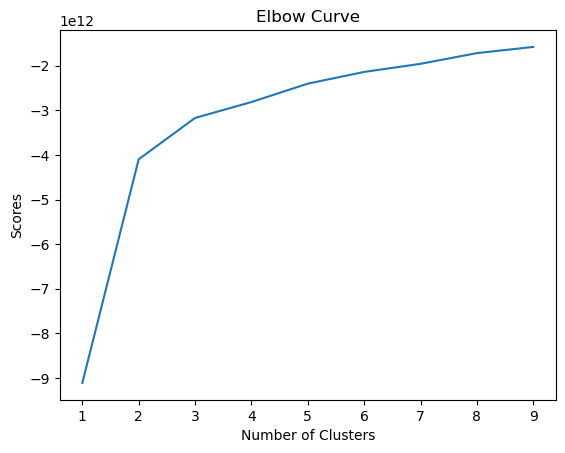

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Scores')
pl.title('Elbow Curve')
pl.show()

The Scores begin to level off after the number of clusters surpases a value of 3. 

#### 4. Select Number of Clusters

#### As stated and visualized above, the Scores level off once the Number of Clusters passes a value of 3. 
#### Therefore, by applying the Elbow Technique, I will select 3 Clusters for this k-means analysis.
#### This will ensure that there is enough variation between the Clusters to identify differences between the clusters.
#### Selecting more than 3 Clusters in this instance would potentially result in several Clusters being too similar with fewer insights to glean from each cluster.

#### 5. Run K-Means Algorithm

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=3)

#### 6. Attach Clusters column to Dataframe

In [20]:
df_num['clusters'] = kmeans.fit_predict(df_num)

In [21]:
df_num.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Number_Operating_Airline,Dep_Time,Dep_Delay,Dep_Delay_Minutes,Dep_Del_15,...,Air_Time,Flights,Distance,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,clusters
11,2019,1,1,4,5,5670,708.0,23.0,23.0,1.0,...,97.0,1.0,642.0,3,13.0,0.0,3.0,0.0,10.0,2
50,2019,1,1,4,5,5714,2252.0,-4.0,0.0,0.0,...,42.0,1.0,190.0,1,0.0,0.0,20.0,0.0,0.0,2
59,2019,1,1,4,5,5726,1337.0,62.0,62.0,1.0,...,28.0,1.0,125.0,1,60.0,0.0,0.0,0.0,0.0,2
65,2019,1,1,4,5,5733,905.0,760.0,760.0,1.0,...,48.0,1.0,125.0,1,0.0,760.0,34.0,0.0,0.0,2
101,2019,1,1,4,5,5775,1011.0,135.0,135.0,1.0,...,154.0,1.0,1013.0,5,135.0,0.0,21.0,0.0,0.0,2


In [22]:
df_num['clusters'].value_counts()

clusters
1    982837
0    759794
2    506622
Name: count, dtype: int64

This appears to be a fairly normal distribution with a left or negative skew (more values in Cluster 0 than Cluster 2 and most values in the middle at Cluster 1).

#### 7. Visualize Clusters with Different Variables

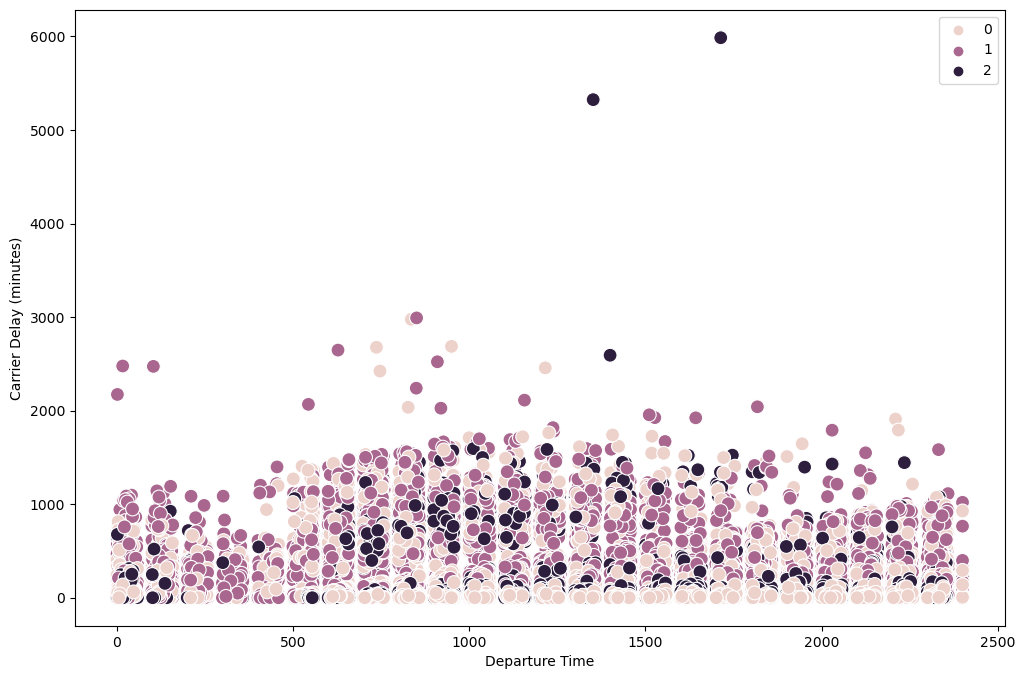

In [23]:
# Plot the clusters for the Departure Time and Carrier Delay variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Dep_Time'], y=df_num['Carrier_Delay'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Departure Time') # Label x-axis.
plt.ylabel('Carrier Delay (minutes)') # Label y-axis.
plt.show()

#### When visualizing the clusters based on Departure Time (x) and Carrier Delay in Minutes (y)
#### there appears to be a relatively mixed distribution amongst the clusters. 
#### Therefore I will need to continue looking for other variables.

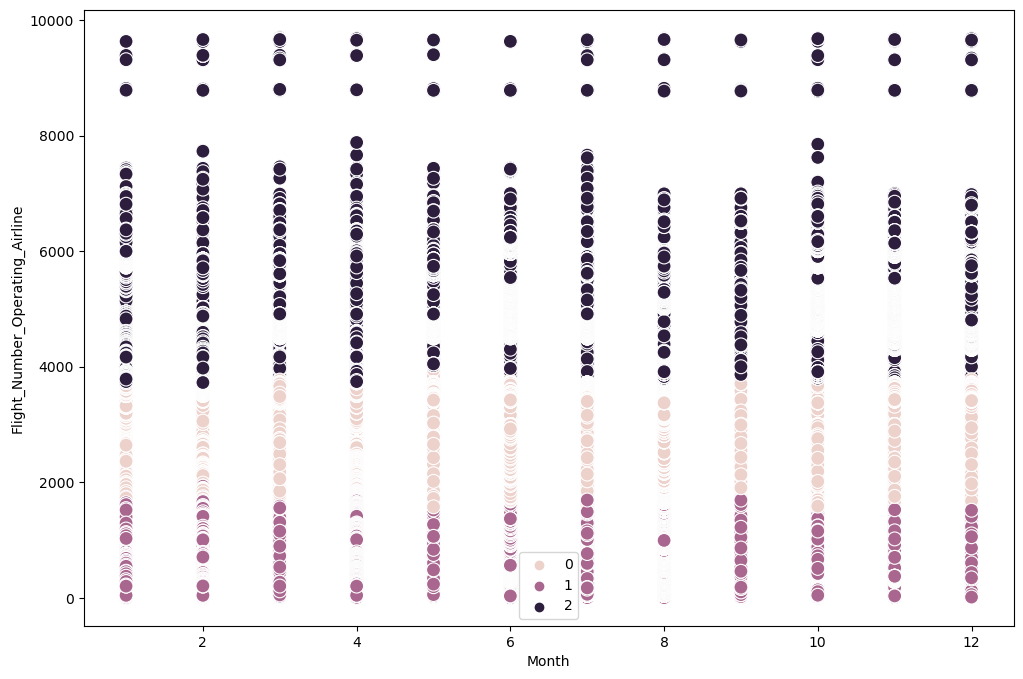

In [25]:
# Plot the clusters for the "Month" and "Flight Number" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Month'], y=df_num['Flight_Number_Operating_Airline'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Month') # Label x-axis.
plt.ylabel('Flight_Number_Operating_Airline') # Label y-axis.
plt.show()

#### When visualizing the clusters based on Month (x) and Flight Number (y)
#### the clusters are apparently grouped based on Flight Number. 
#### Therefore I will need to continue looking for other against Flight Number.

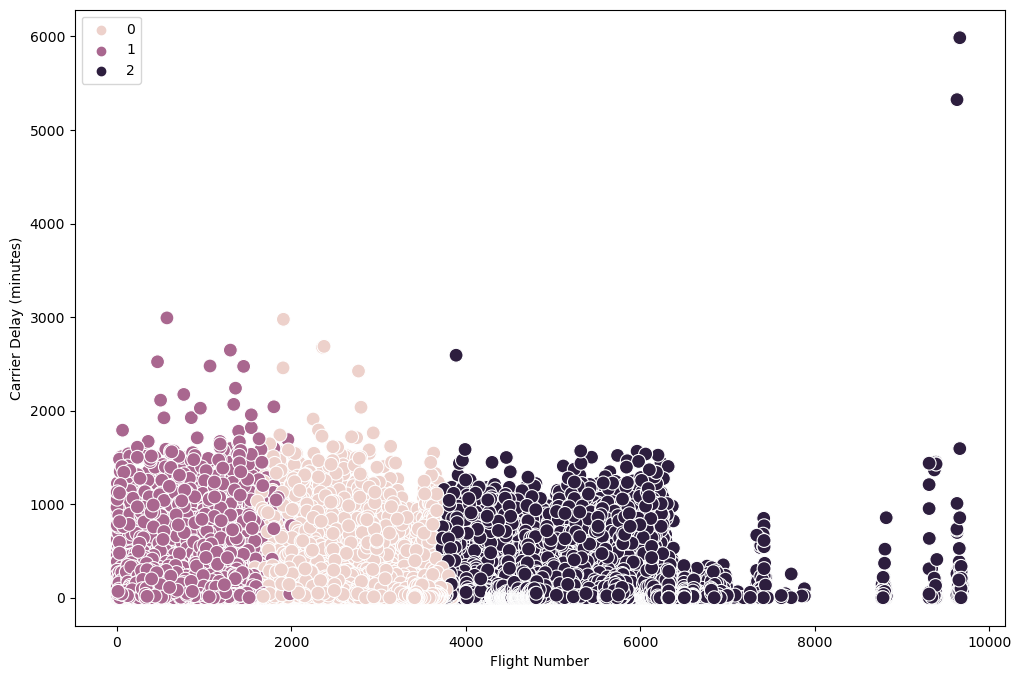

In [27]:
# Plot the clusters for the "Flight Number" and "Carrier Delay" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Flight_Number_Operating_Airline'], y=df_num['Carrier_Delay'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Flight Number') # Label x-axis.
plt.ylabel('Carrier Delay (minutes)') # Label y-axis.
plt.show()

#### Interestingly enough, lower flight numbers (Clusters 0 and 1) apparently have higher carrier delays in minutes, however this may be due to the disparity in volume between the clusters (the left skew referenced previously).

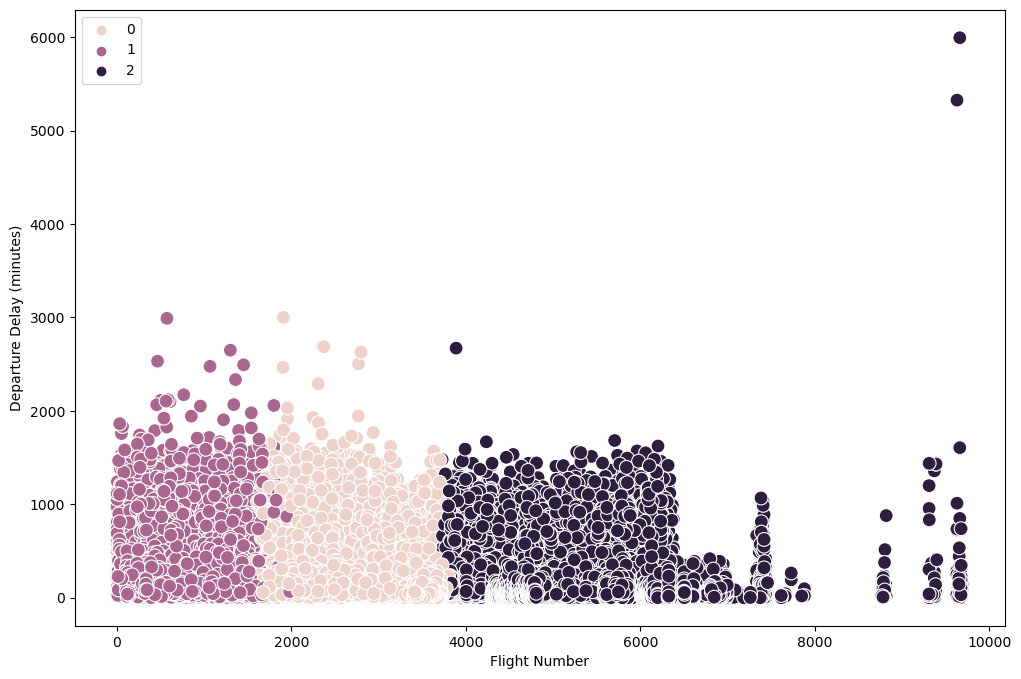

In [28]:
# Plot the clusters for the "Flight Number" and "Departure Delay" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Flight_Number_Operating_Airline'], y=df_num['Dep_Delay_Minutes'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Flight Number') # Label x-axis.
plt.ylabel('Departure Delay (minutes)') # Label y-axis.
plt.show()

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


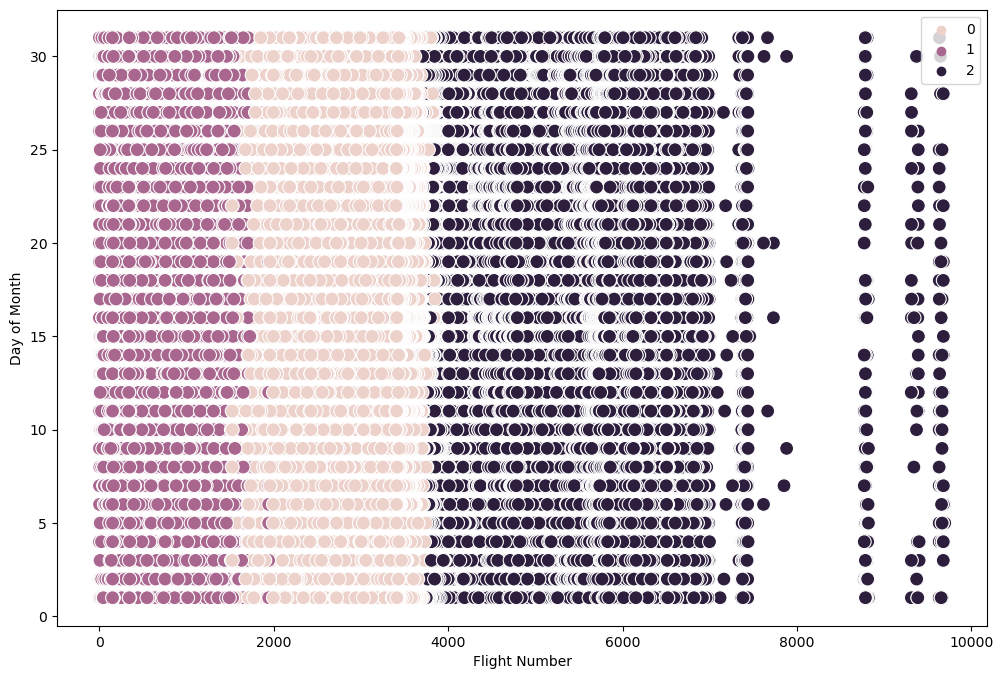

In [29]:
# Plot the clusters for the "Flight Number" and "Day_of_Month" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Flight_Number_Operating_Airline'], y=df_num['Day_of_Month'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Flight Number') # Label x-axis.
plt.ylabel('Day of Month') # Label y-axis.
plt.show()

#### The flight numbers are consistently distributed every day of the month.

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


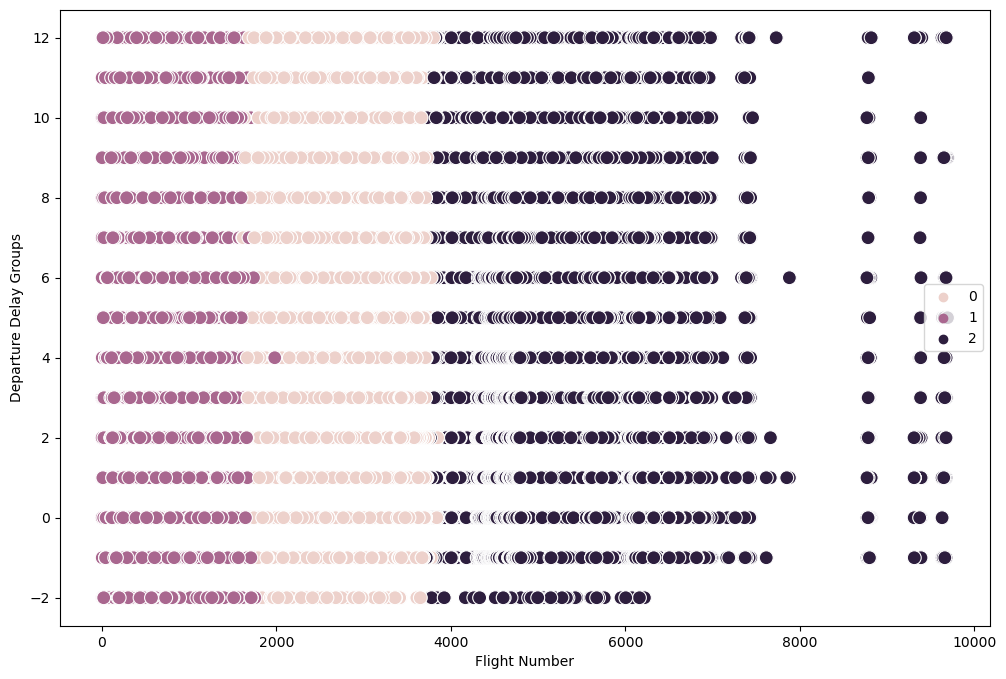

In [30]:
# Plot the clusters for the "Flight Number" and "Departure Delay Groups" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Flight_Number_Operating_Airline'], y=df_num['Departure_Delay_Groups'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Flight Number') # Label x-axis.
plt.ylabel('Departure Delay Groups') # Label y-axis.
plt.show()

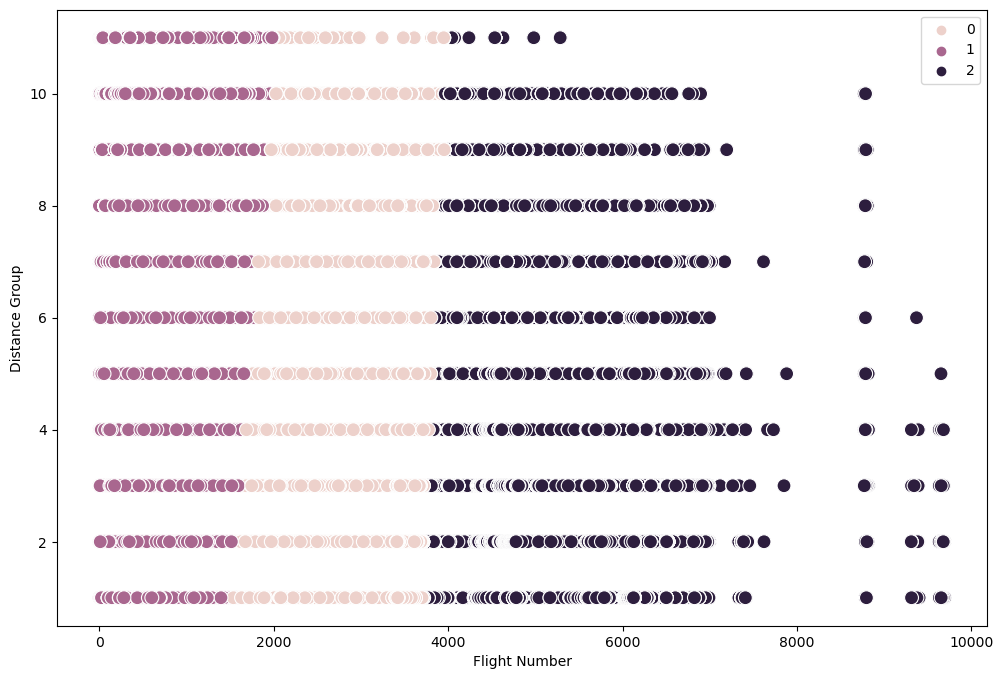

In [35]:
# Plot the clusters for the "Flight Number" and "Distance Group" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Flight_Number_Operating_Airline'], y=df_num['Distance_Group'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Flight Number') # Label x-axis.
plt.ylabel('Distance Group') # Label y-axis.
plt.show()

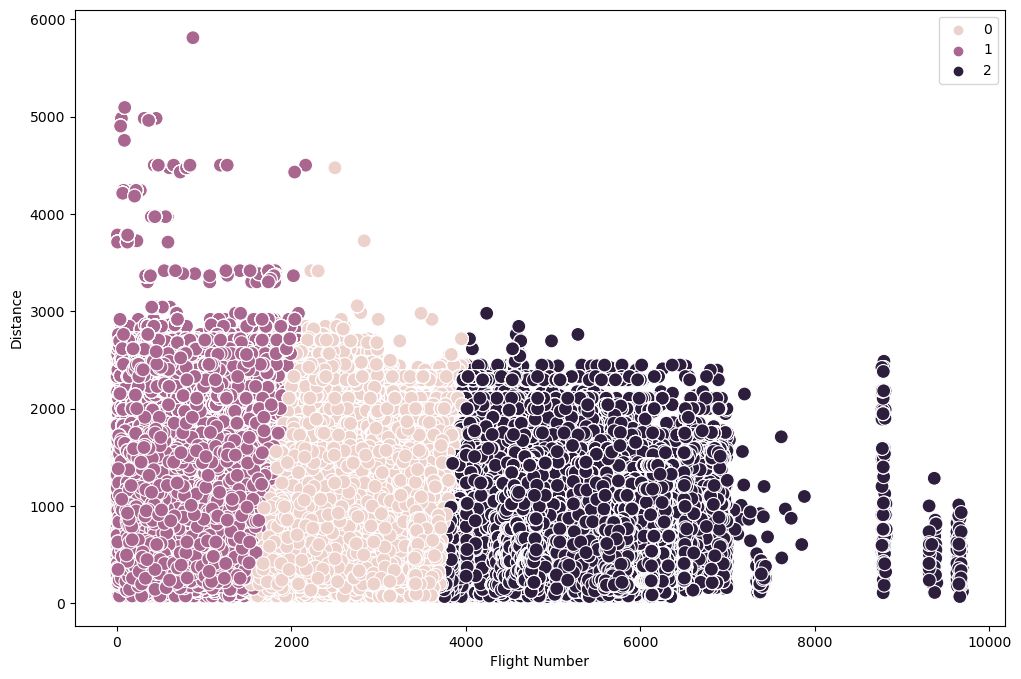

In [38]:
# Plot the clusters for the "Flight Number" and "Distance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Flight_Number_Operating_Airline'], y=df_num['Distance'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Flight Number') # Label x-axis.
plt.ylabel('Distance') # Label y-axis.
plt.show()

#### 8. Discussion of Clusters

#### Based upon this initial visualization of the clusters across multiple variables, the clusters appear to be organized based on Flight Number, as Cluster 0 is between roughly Flight Numbers 1800-3800; Cluster 1 is between roughly Flight Numbers 1-1799, and Cluster 2 is between Flight Numbesr roughly 3801 and above.I am eager to see what the descriptive summary statistics will state about the clusters, as that may give me some additional insights.

#### 9. Descriptive Statistics for Clusters

In [31]:
# Rename Clusters using loc function for ease of reference on descriptive stats

df.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
# Use groupby function to display descriptive statistics of the clusters

df.groupby('cluster').agg({'Dep_Delay_Minutes':['mean', 'median'], 
                         'Distance':['mean', 'median'], 
                         'Arr_Delay_Minutes':['mean', 'median'],
                          'Year':['mean', 'median'],
                          'Dep_Time':['mean', 'median'],
                          'Arr_Time':['mean', 'median'], 
                          'Flight_Number_Operating_Airline':['mean', 'median'],
                          'Carrier_Delay':['mean', 'median'],
                          'Weather_Delay':['mean', 'median'],
                          'Security_Delay':['mean', 'median'],
                          'Late_Aircraft_Delay':['mean','median'],
                          'NAS_Delay':['mean','median'],
                          'Quarter':['mean', 'median'],
                          'Month':['mean', 'median'],
                          'Distance_Group':['mean', 'median']})

Dep_Delay_Minutes            Distance         Arr_Delay_Minutes  \
                         mean median         mean  median              mean   
cluster                                                                       
dark purple         66.510479   42.0   519.555047   453.0         70.694127   
pink                60.459998   39.0   820.602358   728.0         63.481412   
purple              60.634244   39.0  1169.981057  1009.0         63.835043   

                           Year             Dep_Time          ...  \
            median         mean  median         mean  median  ...   
cluster                                                       ...   
dark purple   43.0  2020.342989  2020.0  1558.124489  1607.0  ...   
pink          39.0  2020.549412  2021.0  1550.524333  1620.0  ...   
purple        39.0  2020.580259  2021.0  1501.088830  1554.0  ...   

            Late_Aircraft_Delay         NAS_Delay          Quarter         \
                           mean median       mean median      mean median   
cluster                                                                     
dark purple           26.291867    0.0  10.836002    0.0  2.478487    3.0   
pink                  23.936435    0.0  12.188417    0.0  2.550976    3.0   
purple                22.173166    0.0  14.571073    2.0  2.548011    3.0   

                Month        Distance_Group         
                 mean median           mean median  
cluster                                             
dark purple  6.439643    7.0       2.577395    2.0  
pink         6.671943    7.0       3.751783    3.0  
purple       6.667948    7.0       5.121666    5.0  

[3 rows x 30 columns]

In [33]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [37]:
# Use groupby function to display descriptive statistics of the clusters

df.groupby('cluster').agg({'Dep_Delay_Minutes':['mean', 'median'], 
                         'Distance':['mean', 'median'], 
                         'Arr_Delay_Minutes':['mean', 'median'],
                          'Year':['mean', 'median'],
                          'Dep_Time':['mean', 'median'],
                          'Arr_Time':['mean', 'median'], 
                          'Flight_Number_Operating_Airline':['mean', 'median','min','max'],
                          'Carrier_Delay':['mean', 'median'],
                          'Weather_Delay':['mean', 'median'],
                          'Security_Delay':['mean', 'median'],
                          'Late_Aircraft_Delay':['mean','median'],
                          'NAS_Delay':['mean','median'],
                          'Quarter':['mean', 'median'],
                          'Month':['mean', 'median'],
                          'Distance_Group':['mean', 'median']})

Dep_Delay_Minutes            Distance         Arr_Delay_Minutes  \
                         mean median         mean  median              mean   
cluster                                                                       
dark purple         66.510479   42.0   519.555047   453.0         70.694127   
pink                60.459998   39.0   820.602358   728.0         63.481412   
purple              60.634244   39.0  1169.981057  1009.0         63.835043   

                           Year             Dep_Time             Arr_Time  \
            median         mean  median         mean  median         mean   
cluster                                                                     
dark purple   43.0  2020.342989  2020.0  1558.124489  1607.0  1594.312649   
pink          39.0  2020.549412  2021.0  1550.524333  1620.0  1540.505392   
purple        39.0  2020.580259  2021.0  1501.088830  1554.0  1486.754593   

                    Flight_Number_Operating_Airline                      \
             median                            mean  median   min   max   
cluster                                                                   
dark purple  1714.0                     4984.374492  4989.0  3682  9694   
pink         1713.0                     2547.769951  2429.0  1488  3982   
purple       1646.0                      843.439533   792.0     1  2163   

            Carrier_Delay        Weather_Delay        Security_Delay         \
                     mean median          mean median           mean median   
cluster                                                                       
dark purple     27.614967    4.0      5.862716    0.0       0.088575    0.0   
pink            23.598221    6.0      3.625829    0.0       0.132510    0.0   
purple          24.149566    6.0      2.762248    0.0       0.178989    0.0   

            Late_Aircraft_Delay         NAS_Delay          Quarter         \
                           mean median       mean median      mean median   
cluster                                                                     
dark purple           26.291867    0.0  10.836002    0.0  2.478487    3.0   
pink                  23.936435    0.0  12.188417    0.0  2.550976    3.0   
purple                22.173166    0.0  14.571073    2.0  2.548011    3.0   

                Month        Distance_Group         
                 mean median           mean median  
cluster                                             
dark purple  6.439643    7.0       2.577395    2.0  
pink         6.671943    7.0       3.751783    3.0  
purple       6.667948    7.0       5.121666    5.0

#### 10. Impact of Results for Future Analysis

#### The descriptive statistics for the clusters add additional context not immediately observed in the scatterplots.

#### Mainly, the higher the Flight Number the lower average and median distance group. Cluster 2 has a mean distance group (2.577) almost half that of Cluster 1 (5.121). 

#### Cluster 2 also has a higher average departure time (1558) almost an hour later than Cluster 1 (1501).

#### Cluster 2 has a mean departure delay of 66.5 minutes, almost exactly 6 minutes more than Cluster 1 (60.6). 